<a href="https://colab.research.google.com/github/freddy120/kalmantp1/blob/main/KalmanFilter_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FILTRO DE KALMAN. ESTIMACION DE LA TRAYECTORIA DE UN VEHICULO

CEIA 2021

Freddy Mendoza Ticona




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

### Cargar datos:

In [ ]:
p_data = np.genfromtxt('posicion.dat', 
                     delimiter=' ')
v_data = np.genfromtxt('velocidad.dat',
                     delimiter=' ')
a_data = np.genfromtxt('aceleracion.dat',
                     delimiter=' ')


In [ ]:
print(p_data.shape)
print(v_data.shape)
print(a_data.shape)

(351, 3)
(351, 3)
(351, 3)


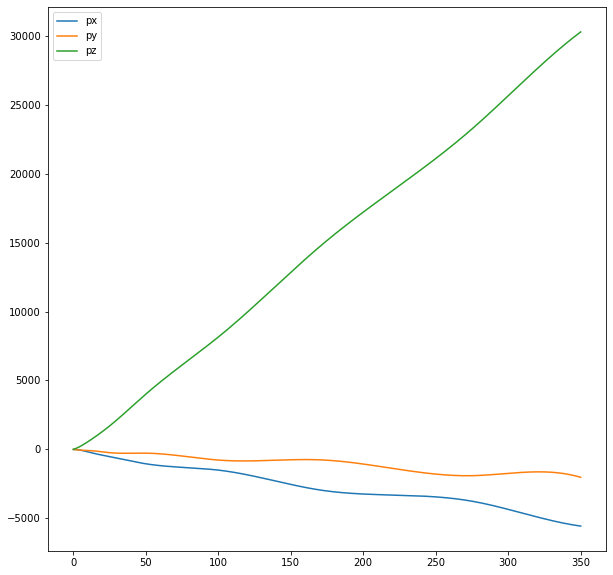

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(range(len(p_data)), p_data )
plt.legend(['px','py','pz'])
plt.show()

### Generar mediciones:


1) Se mide la posicion afectada por ruido blanco (gaussiano) de 10m de desvio estandar.
Es decir que se le debe agregar ruido blanco con una distribucion gaussiana con
media cero y desvio 10.

In [ ]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))

In [ ]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [ ]:
p_predictions = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in p_measurements:
    #predict
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    p_predictions.append(np.dot(H, x)) # z1 estimado
    
           
    # update
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) # Kalman gain 
    
    # State update
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

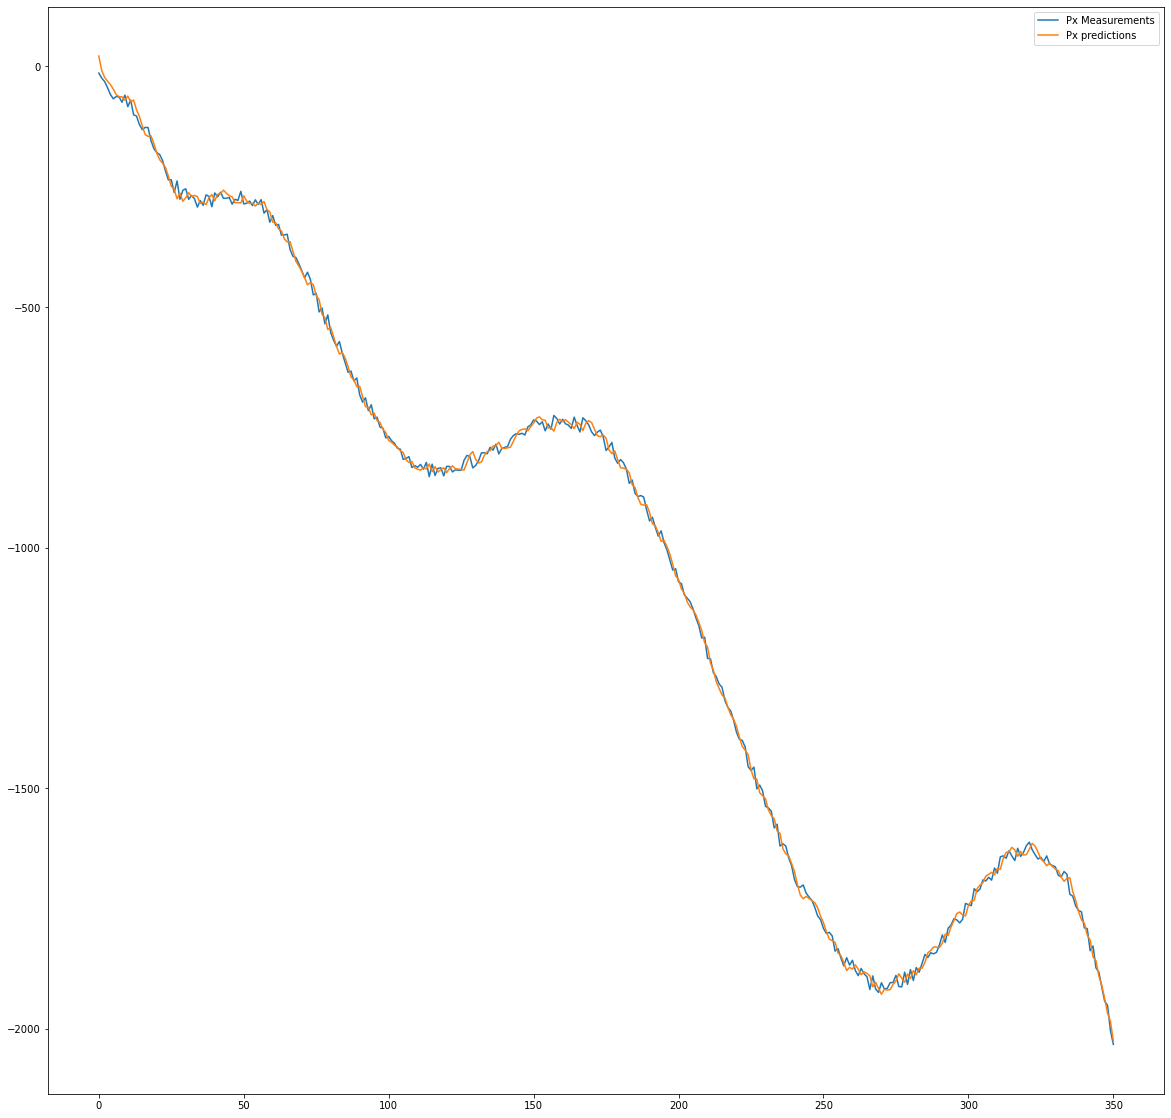

In [ ]:
#np.array(p_predictions)
plt.rcParams['figure.figsize'] = [20, 20]
#plt.plot(range(len(p_data)), p_data[:,1], label = 'Px real')
plt.plot(range(len(p_measurements)), p_measurements[:,1], label = 'Px Measurements')
plt.plot(range(len(p_predictions)), np.array(p_predictions)[:,1], label = 'Px predictions')
plt.legend()
plt.show()

2) Se mide la posicion afectada por ruido blanco (uniforme) de 10m de desvio estandar.
Similar al item anterior. La idea es comparar con el item anterior. Analizar si hubo
algun cambio.

In [ ]:
p_measurements = p_data + np.random.uniform(-10*math.sqrt(3), 10*math.sqrt(3), (len(p_data), 3))

In [ ]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [ ]:
p_predictions = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in p_measurements:
    #predict
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    p_predictions.append(np.dot(H, x)) # z1 estimado
    
           
    # update
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) # Kalman gain 
    
    # State update
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

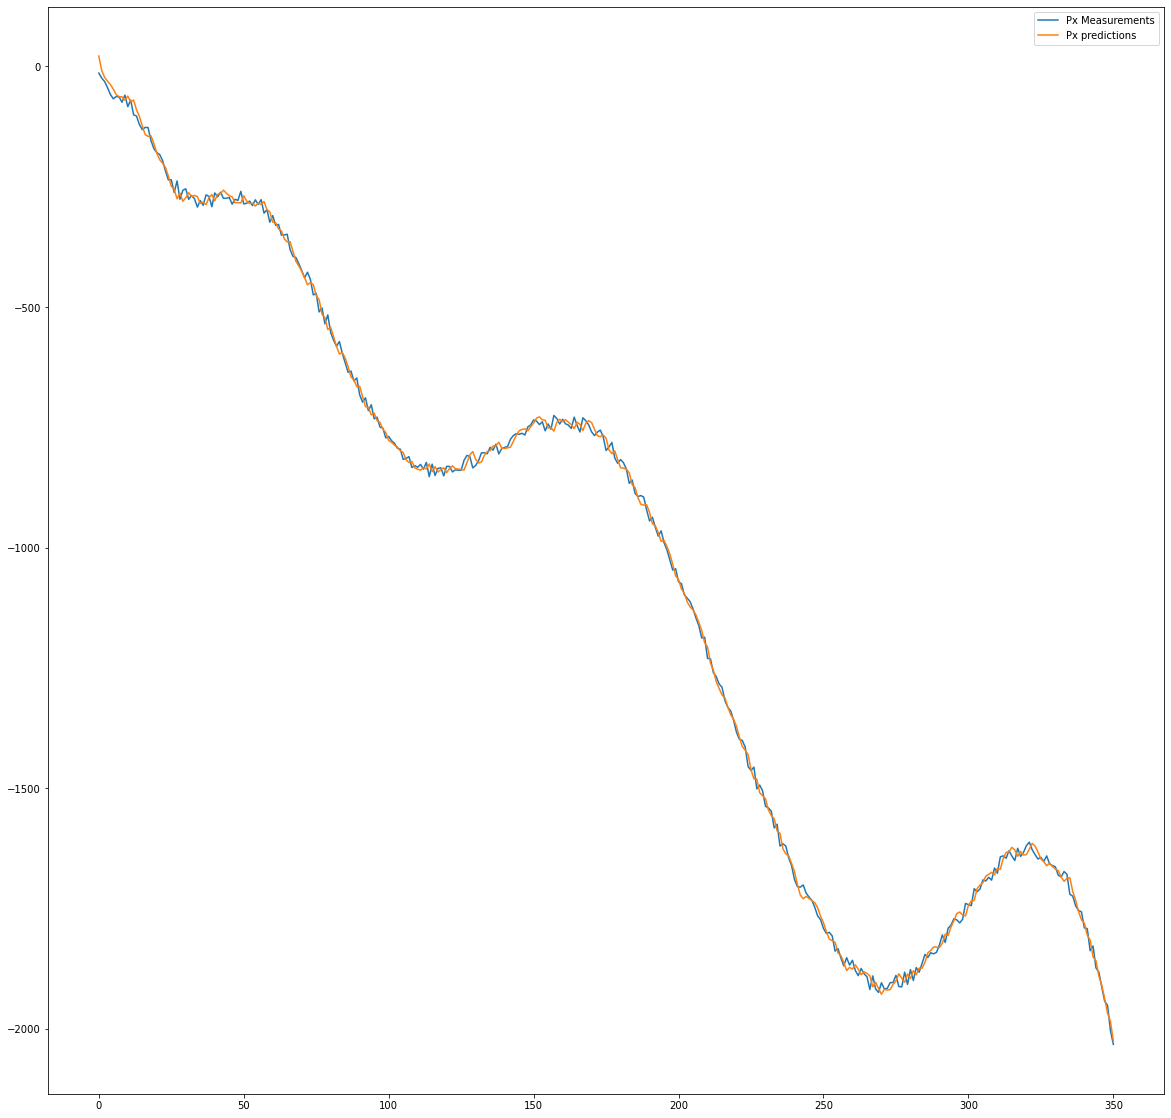

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
#plt.plot(range(len(p_data)), p_data[:,1], label = 'Px real')
plt.plot(range(len(p_measurements)), p_measurements[:,1], label = 'Px Measurements')
plt.plot(range(len(p_predictions)), np.array(p_predictions)[:,1], label = 'Px predictions')
plt.legend()
plt.show()

3. Se mide la posicion y la velocidad afectadas por ruido blanco (gaussiano) de 10m
y 0.2m/s de desvios respectivamente. Analizar si mejora la estimacion

In [ ]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))
v_measurements = v_data + np.random.normal(0, 0.2, (len(v_data), 3))
pv_measurements = np.concatenate((p_measurements, v_measurements), axis=1)

In [ ]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0]])

R = np.array([[100, 0, 0, 0, 0, 0], 
              [0, 100, 0, 0, 0, 0],
              [0, 0, 100, 0, 0, 0],
              [0, 0, 0, 0.04, 0, 0],
              [0, 0, 0, 0, 0.04, 0],
              [0, 0, 0, 0, 0, 0.04]])



In [ ]:
pv_predictions = []

# initialization
x=x0
P=P0
n=F.shape[1]

for z in np.concatenate((p_measurements, v_measurements), axis=1):
    #predict
    x = np.dot(F, x) 
    P = np.dot(np.dot(F, P), F.T) + Q 
    
    pv_predictions.append(np.dot(H, x)) # z1 estimado
    
           
    # update
    S = R + np.dot(H, np.dot(P, H.T))
    K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) # Kalman gain 
    
    # State update
    x = x + np.dot(K,  z - np.dot(H, x)) 
    
    #covarianza update
    I = np.identity(n)
    P = np.dot(np.dot(I - np.dot(K, H), P), 
               (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 

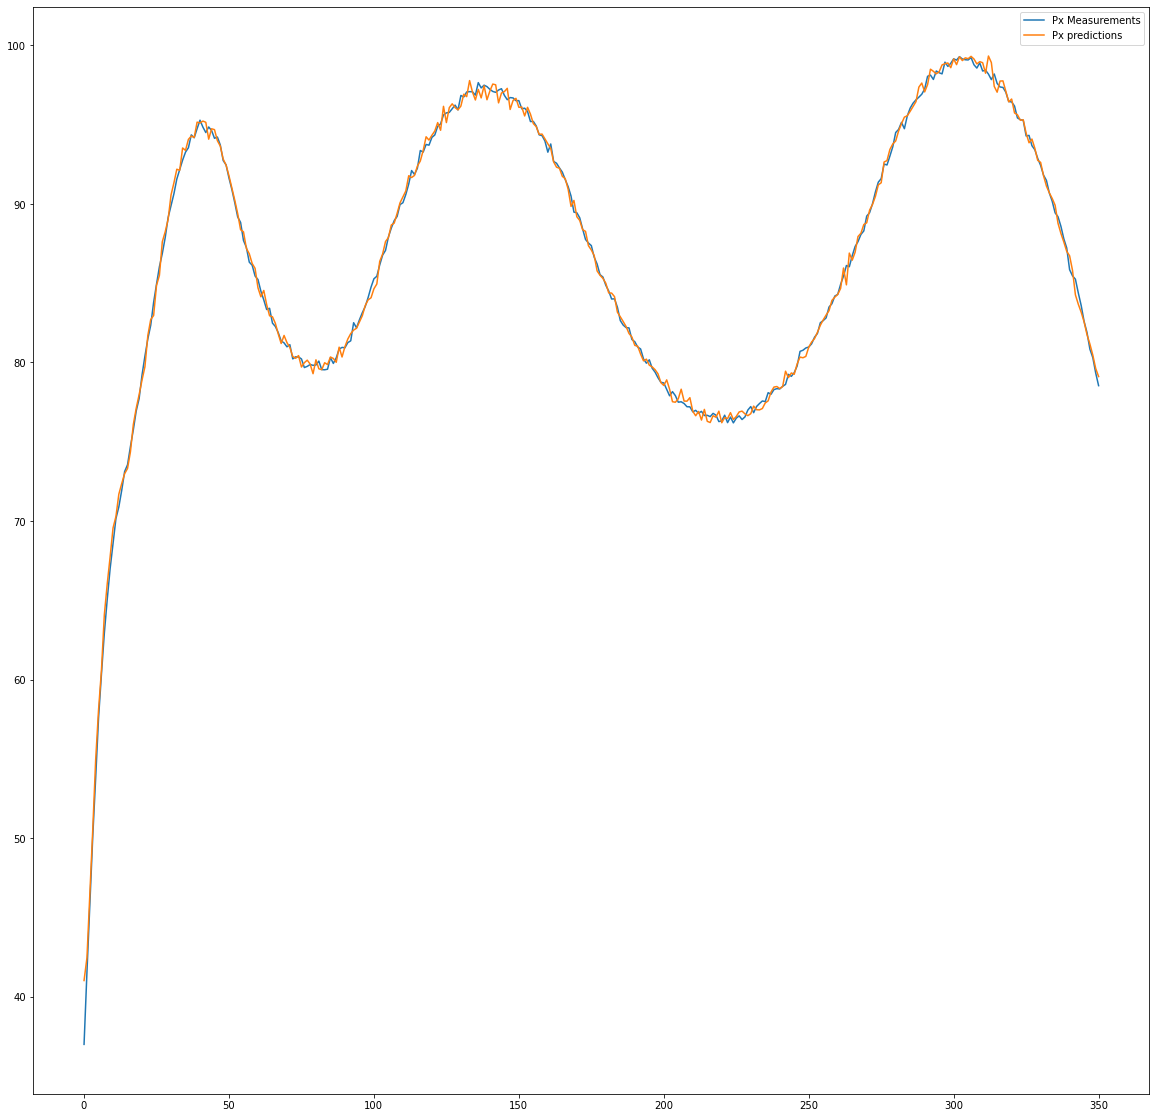

In [ ]:
plt.rcParams['figure.figsize'] = [20, 20]
#plt.plot(range(len(p_data)), p_data[:,1], label = 'Px real')
plt.plot(range(len(pv_measurements)), pv_measurements[:,5], label = 'Px Measurements')
plt.plot(range(len(pv_predictions)), np.array(pv_predictions)[:,5], label = 'Px predictions')
plt.legend()
plt.show()